In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualizing Decision Trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

%matplotlib inline

In [ ]:
gender = pd.read_csv("../data/raw/titanic/gender_submission.csv")
gender.info()
gender.head()

In [2]:
train = pd.read_csv("../data/raw/titanic/train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv("../data/raw/titanic/test.csv") # dataset used by Kaggle to evaluate our model performance egal to everyone
test.info()
test.head()

In [ ]:
train["Sex"].unique()

In [ ]:
train["Pclass"].unique()

In [ ]:
train["Embarked"].unique()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", title = "Proportions of men and women who survived and died")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of men and women who survived and died according to their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of people who survived and died according to the embarked place and their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Sex", barmode = "group", facet_col = "Pclass",
                  title="Repartition of men and women in different embarked places according to their social class")
fig.show()

In [3]:
# Separating the features and the target (Survived)
X = train.drop(columns = ["Survived"])
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y = train["Survived"]
y.info()
y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
# Splitting the train dataset, to evaluate my model's performance
# Good practice: splitting the earlier as possible, to avoid that data from dataset could be found in the test dataset
# ex: filling missing data with mean of all data of the whole "Age" column: calculate the mean in the train dataset and report in
# in the test one
# ex: Embarked: missing values at 0 => to verify the impact on the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [6]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [7]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
525,526,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
381,382,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C


In [8]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 596, dtype: int64

In [9]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [10]:
def apply_male_int(sex):
    if sex == "male":
        sex = 1
    else:
        sex = 0
    return sex

In [11]:
X_train["male"] = X_train["Sex"].apply(apply_male_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0


In [12]:
def apply_Pclass_int(Pclass):
    if Pclass != 1:
        Pclass = 0
    return Pclass

In [13]:
X_train["Pclass1"] = X_train["Pclass"].apply(apply_Pclass_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 65.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0


In [14]:
def apply_Pclass(Pclass):
    if Pclass != 2:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [15]:
X_train["Pclass2"] = X_train["Pclass"].apply(apply_Pclass)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 69.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0


In [16]:
def apply_Pclass_last(Pclass):
    if Pclass != 3:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [17]:
X_train["Pclass3"] = X_train["Pclass"].apply(apply_Pclass_last)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0,1


In [18]:
# replacing NaN values by the mean of the column in Age one
X_train["Age"].unique()

array([54.  ,   nan, 25.  , 26.  , 22.  , 31.  , 49.  , 19.  , 24.  ,
       16.  , 39.  , 47.  , 60.  , 27.  , 38.  , 44.  , 21.  , 45.  ,
        8.  , 32.  , 50.  , 23.  , 15.  , 28.  , 41.  , 33.  , 52.  ,
       20.  ,  9.  , 43.  , 17.  , 37.  , 62.  , 46.  , 29.  , 56.  ,
       59.  , 58.  ,  3.  , 30.  , 28.5 , 36.  ,  0.75, 35.  , 55.  ,
       51.  ,  2.  , 14.  , 45.5 ,  4.  , 40.5 , 40.  , 18.  , 12.  ,
       11.  ,  1.  ,  7.  , 70.5 , 34.  , 70.  , 42.  , 48.  , 80.  ,
       55.5 , 14.5 , 10.  , 53.  , 32.5 , 74.  , 64.  ,  6.  ,  5.  ,
       24.5 ,  0.42, 61.  ,  0.67, 13.  ,  0.83])

In [19]:
mean_age = X_train["Age"].mean()
mean_age

29.525983263598327

In [20]:
X_train["Age"].fillna(mean_age, inplace = True)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1


In [21]:
def apply_embarked_S(embarked):
    if embarked != "S":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [22]:
X_train["Embarked_S"] = X_train["Embarked"].apply(apply_embarked_S)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 79.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1


In [23]:
def apply_embarked_Q(embarked):
    if embarked != "Q":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [24]:
X_train["Embarked_Q"] = X_train["Embarked"].apply(apply_embarked_Q)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 83.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0


In [25]:
def apply_embarked_C(embarked):
    if embarked != "C":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [26]:
X_train["Embarked_C"] = X_train["Embarked"].apply(apply_embarked_C)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
 17  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 88.5+

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0,0


In [27]:
X_train = X_train.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Age          596 non-null    float64
 3   SibSp        596 non-null    int64  
 4   Parch        596 non-null    int64  
 5   Fare         596 non-null    float64
 6   male         596 non-null    int64  
 7   Pclass1      596 non-null    int64  
 8   Pclass2      596 non-null    int64  
 9   Pclass3      596 non-null    int64  
 10  Embarked_S   596 non-null    int64  
 11  Embarked_Q   596 non-null    int64  
 12  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 65.2 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,54.000000,0,0,51.8625,1,1,0,0,1,0,0
718,719,3,29.525983,0,0,15.5000,1,0,0,1,0,1,0
685,686,2,25.000000,1,2,41.5792,1,0,1,0,0,0,1
73,74,3,26.000000,1,0,14.4542,1,0,0,1,0,0,1
882,883,3,22.000000,0,0,10.5167,0,0,0,1,1,0,0


In [28]:
# same transformations on the X_test dataset
X_test["male"] = X_test["Sex"].apply(apply_male_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 30.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0


In [29]:
X_test["Pclass1"] = X_test["Pclass"].apply(apply_Pclass_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 32.3+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0


In [30]:
X_test["Pclass2"] = X_test["Pclass"].apply(apply_Pclass)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 34.6+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0


In [31]:
X_test["Pclass3"] = X_test["Pclass"].apply(apply_Pclass_last)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0,1


In [32]:
X_test["Age"].fillna(mean_age, inplace = True)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1


In [33]:
X_test["Embarked_S"] = X_test["Embarked"].apply(apply_embarked_S)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 39.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0


In [34]:
X_test["Embarked_Q"] = X_test["Embarked"].apply(apply_embarked_Q)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 41.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0


In [35]:
X_test["Embarked_C"] = X_test["Embarked"].apply(apply_embarked_C)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
 17  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 43.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0,1


In [36]:
X_test = X_test.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Age          295 non-null    float64
 3   SibSp        295 non-null    int64  
 4   Parch        295 non-null    int64  
 5   Fare         295 non-null    float64
 6   male         295 non-null    int64  
 7   Pclass1      295 non-null    int64  
 8   Pclass2      295 non-null    int64  
 9   Pclass3      295 non-null    int64  
 10  Embarked_S   295 non-null    int64  
 11  Embarked_Q   295 non-null    int64  
 12  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 32.3 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,29.525983,1,1,15.2458,1,0,0,1,0,0,1
439,440,2,31.000000,0,0,10.5000,1,0,1,0,1,0,0
840,841,3,20.000000,0,0,7.9250,1,0,0,1,1,0,0
720,721,2,6.000000,0,1,33.0000,0,0,1,0,1,0,0
39,40,3,14.000000,1,0,11.2417,0,0,0,1,0,0,1


In [37]:
# Classification pb:

# - logistic regression
# - decision tree
# - random forest
# - support vector machine
# - K Nearest Neighbour
# - Naive Bayes

# 1) Start by decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# plotting the tree
tree.plot_tree(clf)

In [38]:
# Predicting the results on the test dataset
y_pred = clf.predict(X_test)

In [39]:
# Evaluating the model

## Model accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7661016949152543


Interpretation model evaluation (decision tree):
- Default parameters: accuracy = 0.7593220338983051 (first run), 0.7661016949152543 (2nd run) => good accuracy

In [ ]:
# displaying the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                    filled = True, rounded = True,
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../reports/figures/titanic_decision_tree_colored.png')
Image(graph.create_png())

In [42]:
# 2) Carry on with random forest

clf2 = RandomForestClassifier(max_depth = 2, random_state = 0)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [48]:
y_pred = clf2.predict(X_test)
y_pred
#print(clf2.predict(X_test))

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# Measuring the metrics for random forest classifier

### View accuracy score
accuracy_score(y_test, y_pred) # => 0.7728813559322034

0.7728813559322034

In [52]:
### Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[170,   5],
       [ 62,  58]])

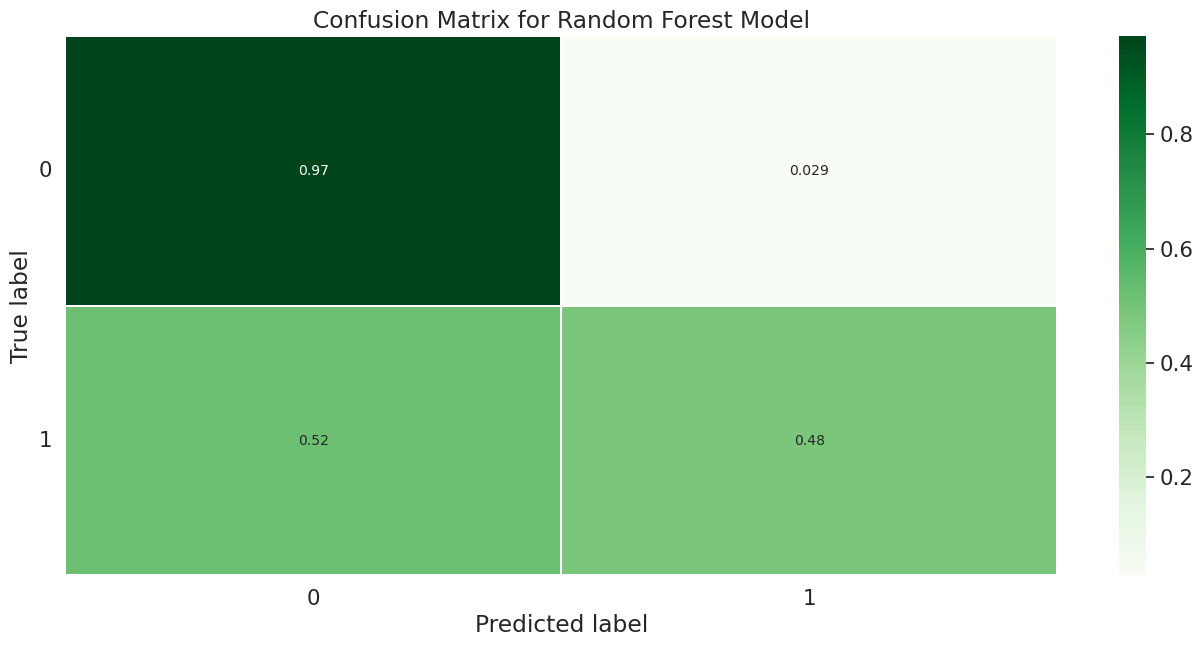

In [73]:
#### Plotting the confusion matrix
#### Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('../reports/figures/confusion_matrix_RFC.png')
#plt.show()

In [74]:
### View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       175
           1       0.92      0.48      0.63       120

    accuracy                           0.77       295
   macro avg       0.83      0.73      0.73       295
weighted avg       0.81      0.77      0.75       295

